# Simplest quantum error detection code

Joschka Roffe, Quantum Error Correction: An Introductory Guide, arXiv:1907.11157v1 [quant-ph] 25 Jul 2019

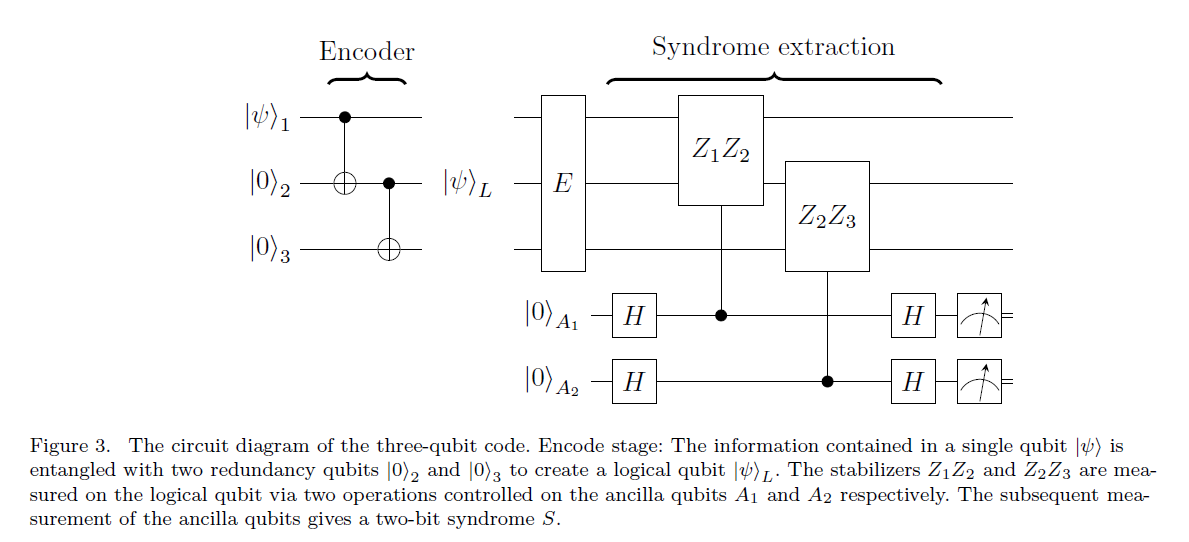

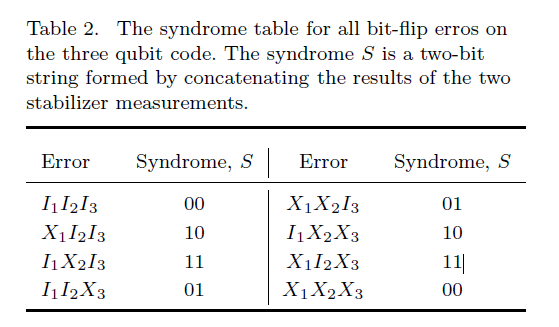

In [1]:
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [2]:
syndr_qc = qiskit.QuantumCircuit(2)
syndr_qc.z(0)
syndr_qc.z(1)
syndr_gate = syndr_qc.to_gate(None,'Syndrome').control(1)

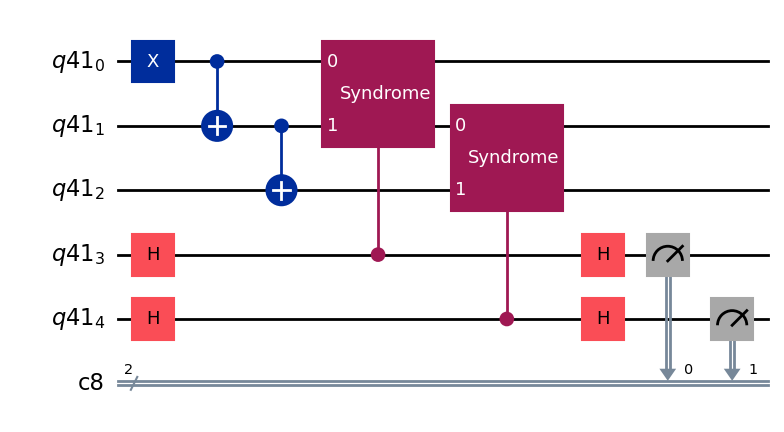

In [19]:
q_reg = Q_R(5)
cl_reg = C_R(2)

qc = qiskit.QuantumCircuit(q_reg, cl_reg)

#state preparation
qc.x(0)

#Encoder
qc.cx(0,1)
qc.cx(1,2)

#Error
#qc.x(1)
#qc.x(0)


#Syndrome extraction
qc.h(3)
qc.h(4)
qc.append(syndr_gate, [3, 0, 1])
qc.append(syndr_gate, [4, 1, 2])
qc.h(3)
qc.h(4)

qc.measure(3,0)
qc.measure(4,1)

qc.draw('mpl')

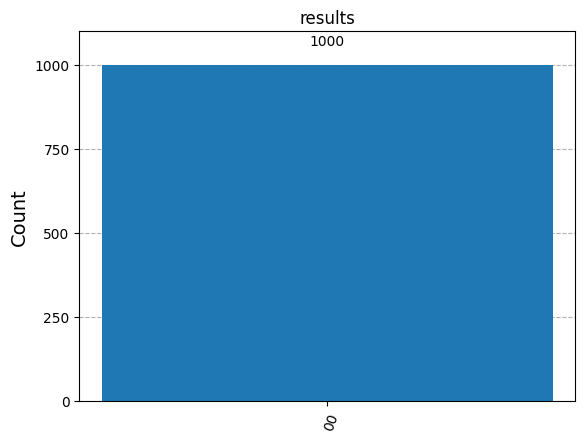

In [20]:
shot_num = 1000
simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = shot_num).result()
counts = result.get_counts(qc_tr)

from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')